# Test IEEE 14 - VSG

static Gen is for power flow calculation, including '' and '' <br>
dynamci Gen is for TDS, indlucing 'GENROW' and 'GENCAL'

In [20]:
import andes
import os
import pandas as pd
import pandapower as pp

# andes and pandapower version
print(f'Andes version: {andes.__version__}')
print(f'Pandapower version: {pp.__version__}')

Andes version: 1.6.2.post3.dev0+g4b164287
Pandapower version: 2.8.0


1. *setup()* is to configure the case, once setup, cannot add new device
   or setup=False and run *ss.setup()* after setting
2. $S_{base}=100MVA$ in the case file
3. 'Toggler' is a group to add connect and disconnect device at specific time.

In [21]:
# get andes case from excel
dir_path = os.path.abspath('..')
case_path = '/Test_buxin/ieee14_vsg1.xlsx'
case = dir_path + case_path
ssa = andes.load(case,
                 setup=False,
                 no_output=True,
                 default_config=False)

Line: unused data {'rate_a': 200}
Line: unused data {'rate_a': 100}
Line: unused data {'rate_a': 100}
Line: unused data {'rate_a': 100}
Line: unused data {'rate_a': 100}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 100}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 100}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 20}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 20}
Line: unused data {'rate_a': 20}
Line: unused data {'rate_a': 20}
Line: unused data {'rate_a': 20}
Line: unused data {'rate_a': 20}


In [22]:
# set load as constant load
# ssa.PQ.config.p2p = 1
# ssa.PQ.config.q2q = 1
# ssa.PQ.config.p2z = 0
# ssa.PQ.config.q2z = 0
# ssa.PQ.pq2z = 0


# Turn on numba to accelerate TDS
ssa.setup()
ssa.config.numba
ssa.PFlow.run()

ssa.TDS.config.tf = 2.0
ssa.TDS.run()

Suspect initialization issue! Simulation may crash!

    Name     | Var. Value | Eqn. Mismatch
-------------+------------+--------------
 Pe REGCV2 1 | 0.045      | -0.090       
 Pe REGCV2 2 | 0.045      | -0.090       
 Id REGCV2 1 | -0.044     | 0.087        
 Id REGCV2 2 | -0.044     | 0.087        


Initialization failed!!
If you are developing a new model, check the initialization with
   andes -v 10 run -r tds --init /home/bshe/repos/andes/examples/Test_buxin/ieee14_vsg1.xlsx
Otherwise, check the variables that are initialized out of limits.


  0%|          | 0/100 [00:00<?, ?%/s]

True

## Load change

In [23]:
# get `Ppf` (load) on these buses before shedding

pq_p = ssa.PQ.get(src='Ppf', idx=['PQ_2','PQ_3'], attr='v')
pq_p

array([0.5  , 0.478])

In [24]:
ssa.PQ.set(src='Ppf', idx='PQ_2', attr='v', value=1.8)
ssa.PQ.Ppf.v

array([0.217, 1.8  , 0.478, 0.076, 0.15 , 0.295, 0.09 , 0.035, 0.061,
       0.135, 0.2  ])

In [25]:
ssa.TDS.config.tf = 20
ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

True

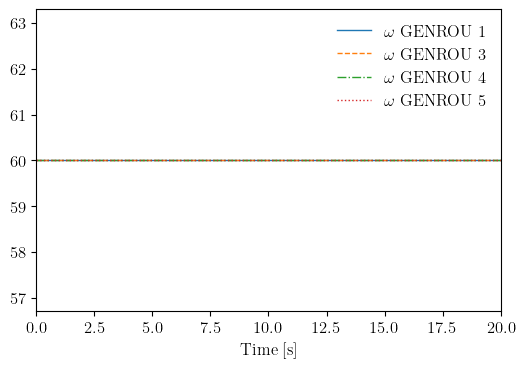

(<Figure size 600x400 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [26]:
ssa.TDS.load_plotter()

ssa.TDS.plt.plot(ssa.GENROU.omega,
                a=(0, 2, 3, 4),
                ytimes=60,
               )

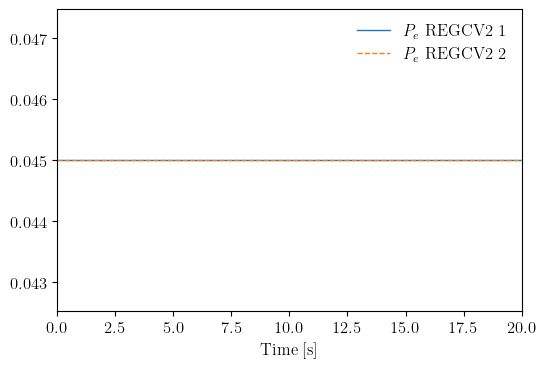

(<Figure size 600x400 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [27]:
ssa.TDS.plt.plot(ssa.REGCV2.Pe,
                a=(0, 1),
                ytimes=1,
               )

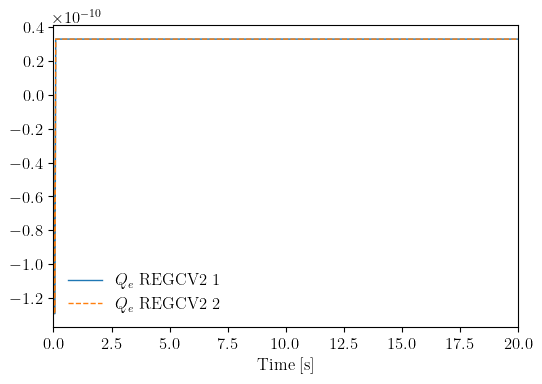

(<Figure size 600x400 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [28]:
ssa.TDS.plt.plot(ssa.REGCV2.Qe,
                a=(0, 1),
                ytimes=1,
               )